<a href="https://colab.research.google.com/github/dirreno/AlgorithmsUN2020I1/blob/main/dirrenolecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [1]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [17]:
import pandas_datareader as pdr
import datetime 
data = pdr.get_data_yahoo(['AAPL', 'MSFT'], start= datetime.datetime(2014,1,1), end= datetime.datetime(2015,1,1))
data

Attributes       High                   Low                  Open             \
Symbols          AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2014-01-02  19.893929  37.400002  19.715000  37.099998  19.845715  37.349998   
2014-01-03  19.775000  37.220001  19.301071  36.599998  19.745001  37.200001   
2014-01-06  19.528570  36.889999  19.057142  36.110001  19.194643  36.849998   
2014-01-07  19.498571  36.490002  19.211430  36.209999  19.440001  36.330002   
2014-01-08  19.484285  36.139999  19.238930  35.580002  19.243214  36.000000   
2014-01-09  19.530714  35.910000  19.119642  35.400002  19.528570  35.880001   
2014-01-10  19.314285  36.150002  18.968214  35.750000  19.279642  35.900002   
2014-01-13  19.375000  36.020000  18.924286  34.830002  18.925358  35.990002   
2014-01-14  19.526072  35.880001  19.202143  34.630001  19.222143  34.730000   
2014-01-15  20.007143  36.790001  19.702143  35.849998  19.768572  35.900002   
2014-01-16  19.887501  37.000000  19.702856  36.310001  19.817858  36.689999   
2014-01-17  19.716785  36.830002  19.282143  36.150002  19.695715  36.830002   
2014-01-21  19.645357  36.820000  19.300714  36.060001  19.321072  36.820000   
2014-01-22  19.903214  36.320000  19.564644  35.750000  19.675358  36.259998   
2014-01-23  19.875000  36.130001  19.457500  35.520000  19.640715  36.090000   
2014-01-24  19.843571  37.549999  19.455357  36.529999  19.785713  37.450001   
2014-01-27  19.814285  36.889999  19.491072  35.980000  19.645357  36.869999   
2014-01-28  18.392857  36.389999  17.931070  35.750000  18.170000  36.119999   
2014-01-29  18.120358  36.880001  17.807858  35.900002  17.998215  35.980000   
2014-01-30  18.089287  36.880001  17.739286  36.230000  17.947857  36.790001   
2014-01-31  17.911785  37.889999  17.626785  36.560001  17.684999  36.950001   
2014-02-03  18.133215  37.990002  17.832144  36.430000  17.950357  37.740002   
2014-02-04  18.195000  37.189999  17.955713  36.250000  18.066071  36.970001   
2014-02-05  18.402857  36.470001  18.080357  35.799999  18.091429  36.290001   
2014-02-06  18.339287  36.250000  18.136070  35.689999  18.216429  35.799999   
2014-02-07  18.676071  36.590000  18.477858  36.009998  18.620714  36.320000   
2014-02-10  18.999643  36.799999  18.500000  36.290001  18.523571  36.630001   
2014-02-11  19.205357  37.259998  18.910713  36.860001  18.950357  36.880001   
2014-02-12  19.270000  37.599998  19.044287  37.299999  19.176786  37.349998   
2014-02-13  19.458929  37.860001  19.078571  37.330002  19.094999  37.330002   
...               ...        ...        ...        ...        ...        ...   
2014-11-18  28.922501  49.330002  28.472500  48.700001  28.485001  49.130001   
2014-11-19  28.934999  48.750000  28.450001  47.930000  28.860001  48.660000   
2014-11-20  29.215000  48.700001  28.712500  47.869999  28.727501  48.000000   
2014-11-21  29.392500  49.049999  29.007500  47.570000  29.377501  49.020000   
2014-11-24  29.692499  48.000000  29.155001  47.389999  29.212500  47.990002   
2014-11-25  29.937500  47.970001  29.362499  47.450001  29.767500  47.660000   
2014-11-26  29.775000  47.990002  29.457500  47.279999  29.485001  47.490002   
2014-11-28  29.850000  48.200001  29.512501  47.610001  29.817499  47.950001   
2014-12-01  29.812500  48.779999  27.817499  47.709999  29.702499  47.880001   
2014-12-02  28.937500  49.049999  28.187500  48.200001  28.375000  48.840000   
2014-12-03  29.087500  48.500000  28.777500  47.810001  28.937500  48.439999   
2014-12-04  29.299999  49.060001  28.822500  48.200001  28.942499  48.389999   
2014-12-05  29.020000  48.970001  28.660000  48.380001  28.997499  48.820000   
2014-12-08  28.662500  48.349998  27.905001  47.450001  28.525000  48.259998   
2014-12-09  28.575001  47.919998  27.337500  47.049999  27.547501  47.110001   
2014-12-10  28.712500  47.660000  27.885000  46.700001  28.602501  47.580002   


In [9]:
data2 = pdr.get_data_yahoo('MSFT', start= datetime.datetime(2014,1,1), end= datetime.datetime(2015,1,1))
data2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.057323
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,31.841665
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.168766
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.410315
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,30.849575
2014-01-09,35.910000,35.400002,35.880001,35.529999,36516300.0,30.651161
2014-01-10,36.150002,35.750000,35.900002,36.040001,40548800.0,31.091124
2014-01-13,36.020000,34.830002,35.990002,34.980000,45901900.0,30.176680
2014-01-14,35.880001,34.630001,34.730000,35.779999,41623300.0,30.866833


Indexing into the data with `data['AAPL']` will yield an error because the type of the columns are equity objects and not simple strings. Let's change that using this little piece of Python code. Don't worry about understanding it right now, unless you do, in which case congratulations.

In [7]:
data.columns = [e for e in data.columns]
data.head()

,"(High, AAPL)","(High, MSFT)","(Low, AAPL)","(Low, MSFT)","(Open, AAPL)","(Open, MSFT)","(Close, AAPL)","(Close, MSFT)","(Volume, AAPL)","(Volume, MSFT)","(Adj Close, AAPL)","(Adj Close, MSFT)"
Date,,,,,,,,,,,,
2014-01-02,19.893929,37.400002,19.715000,37.099998,19.845715,37.349998,19.754642,37.160000,234684800.0,30632200.0,17.598297,32.057323
2014-01-03,19.775000,37.220001,19.301071,36.599998,19.745001,37.200001,19.320715,36.910000,392467600.0,31134800.0,17.211735,31.841665
2014-01-06,19.528570,36.889999,19.057142,36.110001,19.194643,36.849998,19.426071,36.130001,412610800.0,43603700.0,17.305593,31.168766
2014-01-07,19.498571,36.490002,19.211430,36.209999,19.440001,36.330002,19.287144,36.410000,317209200.0,35802800.0,17.181829,31.410315
2014-01-08,19.484285,36.139999,19.238930,35.580002,19.243214,36.000000,19.409286,35.759998,258529600.0,59971700.0,17.290642,30.849575


Much nicer, now we can index. Indexing into the 2D dataframe will give us a 1D series object. The index for the series is timestamps, the value upon index is a price. Similar to an array except instead of integer indecies it's times.

In [11]:
data2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.057323
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,31.841665
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.168766
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.410315
2014-01-08,36.139999,35.580002,36.000000,35.759998,59971700.0,30.849575


##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

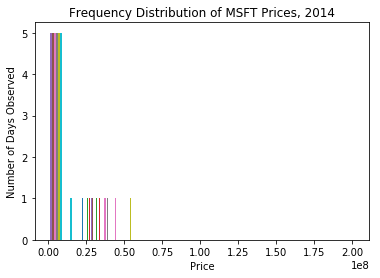

In [12]:
# Plot a histogram using 20 bins
plt.hist(data2, bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

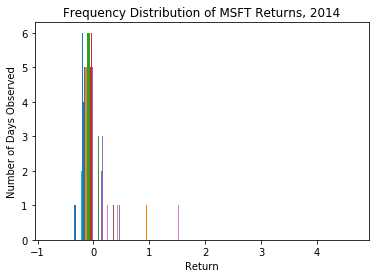

In [13]:
# Remove the first element because percent change from nothing to something is NaN
R = data2.pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

#####IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

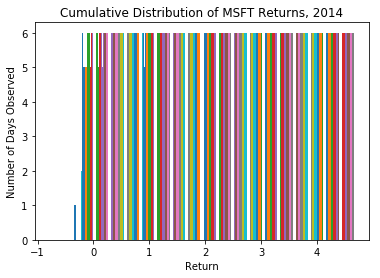

In [14]:
# Remove the first element because percent change from nothing to something is NaN
R = data2.pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

In [15]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

KeyError: ignored

In [ ]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

In [ ]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*